# Analysis for figure 5

## Installations & Downloads

In [75]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pickle
import scipy
import pandas as pd
from scipy import stats
from scipy.stats import normaltest
import matplotlib as mpl
import itertools
from itertools import groupby

sys.path.append(os.path.abspath('../..'))

import warnings
warnings.simplefilter('ignore', pd.errors.DtypeWarning)
np.seterr(divide='ignore')
warnings.simplefilter("ignore")


import analysis.calc_single_cell_properties as calculator 
import analysis.utils as utils
import data_layer.utils as data_utils
from configuration import consts, params

In [2]:
fig_dir_path = fr"/storage/users/assafzar/Muscle_Differentiation_AvinoamLab/eps_figs/"

## data loading - differentiation scores dataframes

In [15]:
scores_df_s3 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S3.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S3.pkl")

scores_df_s2 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S2.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S2.pkl")

scores_df_s6 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S6.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S6.pkl")

scores_df_s8 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (1,5) + fr"df_score_vid_num_S8.pkl",
                              scores_intensity_path=consts.intensity_model_path % (1,5) + fr"df_score_vid_num_S8.pkl")


scores_df_s5 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (2,3) + fr"df_score_vid_num_S5.pkl",
                              scores_intensity_path=consts.intensity_model_path % (2,3) + fr"df_score_vid_num_S5.pkl")

scores_df_s1 = data_utils.get_scores_df(scores_motility_path=consts.motility_model_path % (2,3) + fr"df_score_vid_num_S1.pkl",
                              scores_intensity_path=consts.intensity_model_path % (2,3) + fr"df_score_vid_num_S1.pkl")

Calculate single cell properties

In [4]:
scores_df_s3 = calculator.get_properties(scores_df_s3, vid_name="S3", actin_vid_path=consts.vid_info_dict["3"]['actin_path'])
scores_df_s2 = calculator.get_properties(scores_df_s2, vid_name="S2", actin_vid_path=consts.vid_info_dict["2"]['actin_path'])
scores_df_s6 = calculator.get_properties(scores_df_s6, vid_name="S6", actin_vid_path=consts.vid_info_dict["6"]['actin_path'])
scores_df_s8 = calculator.get_properties(scores_df_s8, vid_name="S8", actin_vid_path=consts.vid_info_dict["8"]['actin_path'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


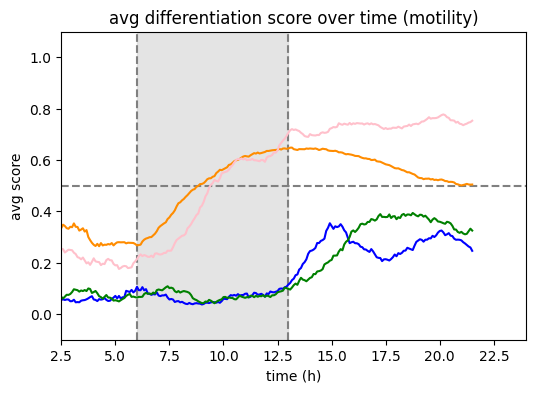

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

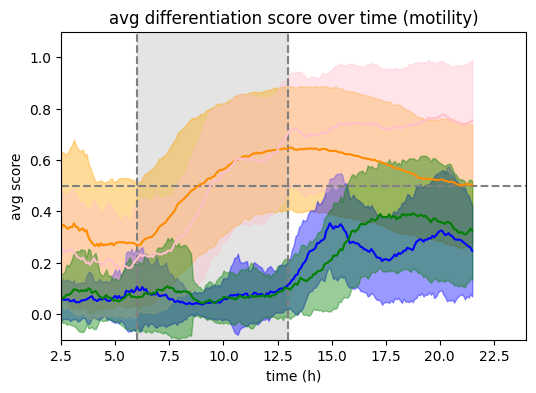

<Figure size 640x480 with 0 Axes>

In [181]:
data_2_3_test  = [(scores_df_s3, "ERKi", "DarkOrange","Orange"), (scores_df_s2, "DMSO", "blue", "blue"),
                  (scores_df_s6,  "ERKi-P38i", "pink", "pink"), (scores_df_s8,  "P38i", "green", "green")]

utils.plot_avg_conf(data_2_3_test, "motility", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) motility", plot_std=False, time=(6,13), xlim=(2.5, 24))
utils.plot_avg_conf(data_2_3_test, "motility", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) motility (std)", plot_std=True, time=(6,13), xlim=(2.5, 24))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


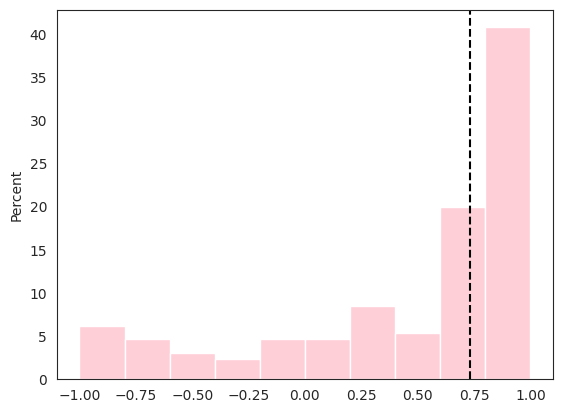

motility mean 0.462 median 0.732
Number of cells in this analysis:  187
% of cells with p-value smaller then pval_thresh: 57.754


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


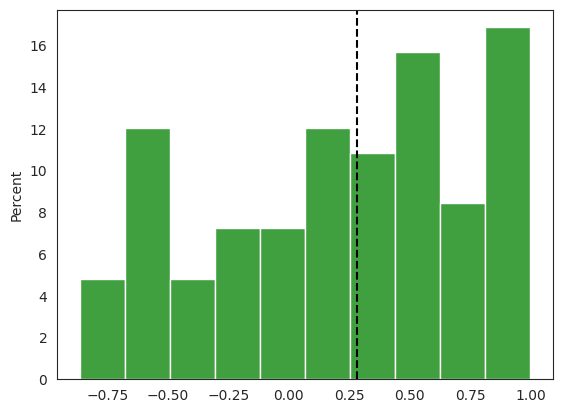

motility mean 0.224 median 0.281
Number of cells in this analysis:  171
% of cells with p-value smaller then pval_thresh: 30.994


In [6]:
utils.plot_monotonicity_dist(scores_df_s6, "P38i", time=(6,13), rolling_w=5, modality="motility", color="pink", pval_thresh=0.05)
utils.plot_monotonicity_dist(scores_df_s8, "ERKi-P38i", time=(6,13), rolling_w=5, modality="motility", color="green", pval_thresh=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


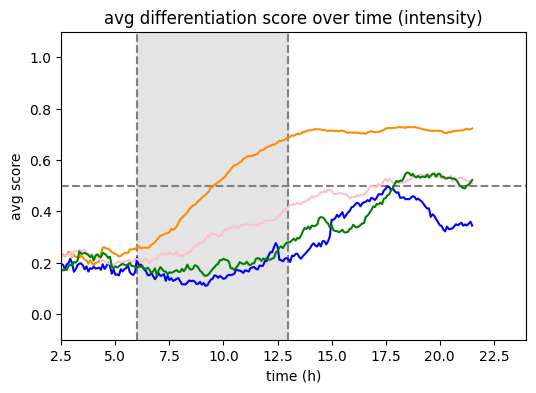

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

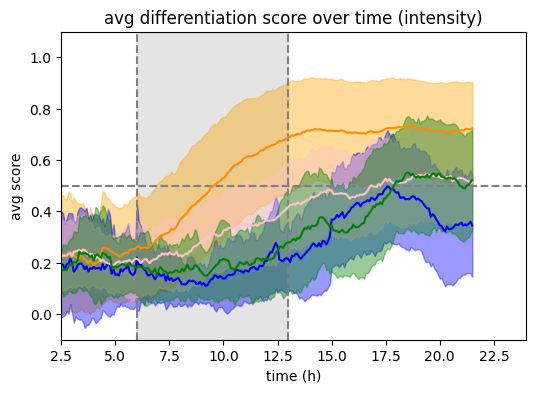

<Figure size 640x480 with 0 Axes>

In [14]:
utils.plot_avg_conf(data_2_3_test, "intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) inensity", plot_std=False, time=(6,13), xlim=(2.5, 24))
utils.plot_avg_conf(data_2_3_test, "intensity", path=fig_dir_path + "avg diff over time train (1,5) test (2, 3, 6, 8) inensity (std)", plot_std=True, time=(6,13), xlim=(2.5, 24))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


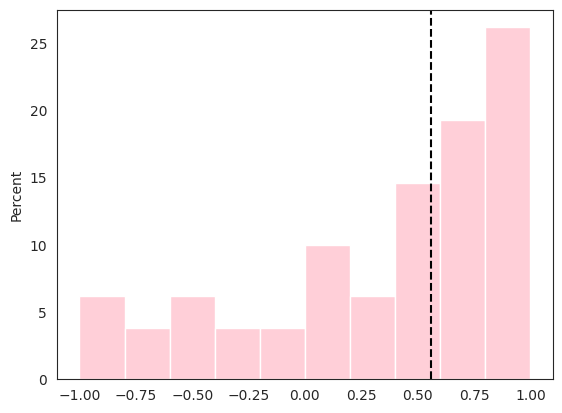

intensity mean 0.349 median 0.56
Number of cells in this analysis:  187
% of cells with p-value smaller then pval_thresh: 54.545


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


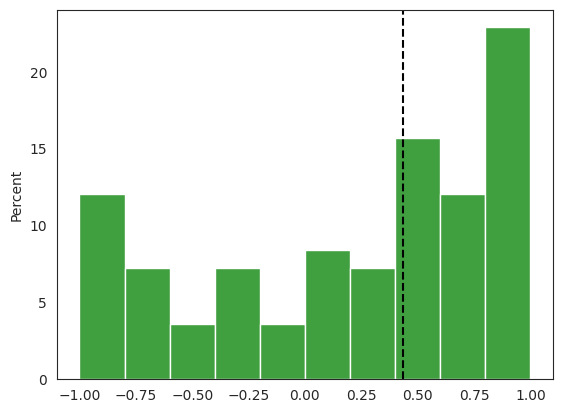

intensity mean 0.213 median 0.433
Number of cells in this analysis:  171
% of cells with p-value smaller then pval_thresh: 35.673


In [8]:
utils.plot_monotonicity_dist(scores_df_s6, "P38i", time=(6,13), rolling_w=5, modality="intensity", color="pink", pval_thresh=0.05)
utils.plot_monotonicity_dist(scores_df_s8, "ERKi-P38i", time=(6,13), rolling_w=5, modality="intensity", color="green", pval_thresh=0.05)

In [4]:
import rft1d
from scipy.ndimage import gaussian_filter1d

In [16]:
def plot_residuals(rA, rB , modality="score_motility"):
    plt.close('all')
    ax = plt.axes()
    hA = ax.plot(rA.T, 'r')
    hB = ax.plot(rB.T, 'b')
    hA[0].set_label('ERKi')
    hB[0].set_label('DMSO')
    ax.legend(loc='upper center')
    ax.set_xlabel('time', size=16)
    ax.set_ylabel(f'{modality} difference from mean', size=16)
    ax.set_title('Model residuals', size=16)
    plt.show()
    

def get_arr(df,time=(0, 22), modality="score_motility", drop_nan_rows=False):
    df = df[(df["time"]>= time[0]) & (df["time"]<= time[1])]
    arr = np.zeros((df["Spot track ID"].nunique(), df["time"].nunique()))
    to_delete = []
    for i, (ind, ser) in enumerate(df.groupby("Spot track ID")):
        arr[i] = np.array(ser[modality])  
        if np.isnan(arr[i]).sum() > 0:
            to_delete.append(i)
    
    arr = np.delete(arr, to_delete, 0) if drop_nan_rows else arr
    return arr

In [78]:
def calc_rft(scores_df_diff, scores_df_con, modality, time=(0, 22), drop_nan_rows=True):
    yA = get_arr(scores_df_diff, time, modality, drop_nan_rows=drop_nan_rows)
    yB = get_arr(scores_df_con, time, modality, drop_nan_rows=drop_nan_rows)
    
    yA = gaussian_filter1d(yA, 2.0, axis=1, mode='wrap')
    yB = gaussian_filter1d(yB, 2.0, axis=1, mode='wrap')
    
    nA, nB = scores_df_diff["Spot track ID"].nunique(), scores_df_con["Spot track ID"].nunique()  #sample sizes
    mA, mB = np.nanmean(yA, axis=0), np.nanmean(yB, axis=0)  #means
    sA, sB = np.nanstd(yA, axis=0, ddof=1), np.nanstd(yB, axis=0, ddof=1)  #standard deviations
    s = np.sqrt( ((nA - 1) * sA * sA + (nB - 1) * sB * sB) / (nA + nB - 2) )  #pooled standard deviation
    t = (mA- mB) / ( s *np.sqrt(1.0/nA + 1.0/nB)) #t field)
    
    rA, rB = yA - mA, yB - mB  #residuals
    r = np.vstack([rA,rB])
    FWHM = rft1d.geom.estimate_fwhm(r)
    
    #(3) Critical threshold (classical hypothesis testing):
    alpha    = 0.05
    df       = nA + nB - 2  #degrees of freedom
    Q        = yA.shape[1]  #number of nodes (field length = Q-1)
    tstar    = rft1d.t.isf(alpha, df, Q, FWHM) #inverse survival function
    
    #(4) Get upcrossing metrics:
    calc      = rft1d.geom.ClusterMetricCalculator()
    k         = calc.cluster_extents(t, tstar, interp=True)
    k_resels  = [kk/FWHM for kk in k]
    nClusters = len(k)
    
    #(5) Probabilities:
    rftcalc  = rft1d.prob.RFTCalculator(STAT='T', df=(1, df), nodes=Q, FWHM=FWHM)
    Pset     = rftcalc.p.set(nClusters, min(k_resels), tstar)
    Pcluster = [rftcalc.p.cluster(kk, tstar)   for kk in k_resels]
    
    print("n_cells for diff:", yA.shape[0], ", n_cells for con:", yB.shape[0], ", nClusters:", nClusters, Pcluster, "Pset", Pset, tstar)
    
    return rA, rB, t, Q, tstar, Pcluster


def plot_rft(score_df_1, score_df2, modality, df1_name, df2_name, ylim=(-15, 25)):
    step = 6
    for start_time in np.arange(2.5, 22.0, step):
        time = (start_time, start_time + step)
        print("time:", time)
        try:
            rA, rB, t, Q, tstar, Pcluster = calc_rft(score_df_1, score_df2, modality, time=time, drop_nan_rows=True)

            plt.close('all')
            fig = plt.Figure(figsize=(5, 5))    
            x_t = np.linspace(time[0], time[1], len(t))
            plt.plot(x_t, t, 'k', lw=3, label='t field')
            plt.plot([x_t[0], x_t[-1]], [tstar]*2, 'r--', label='Critical threshold')

            plt.legend(loc='upper left')

            plt.text(x_t[-5], t[1], r'$\alpha$ = %.3f'%alpha, color='r')

            for i, pval in enumerate(Pcluster):
                plt.text(x_t[-5], 10 + i*2,  'p = %.4f'%round(pval, 4))


            plt.xlabel('time', size=16)
            plt.ylabel('t value', size=16)
            plt.title('RFT-based inference', size=16)
            plt.ylim(ylim)
            plt.savefig(fig_dir_path + f"rft/rft_{modality}_({df1_name}, {df2_name})_time_{time}.eps", format="eps")
            plt.show()
        except:
            break
    

In [70]:
alpha = 0.05

motility
time: (2.5, 8.5)
n_cells for diff: 23 , n_cells for con: 4 , nClusters: 1 [0.0] Pset 0.0 2.526673200576351


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


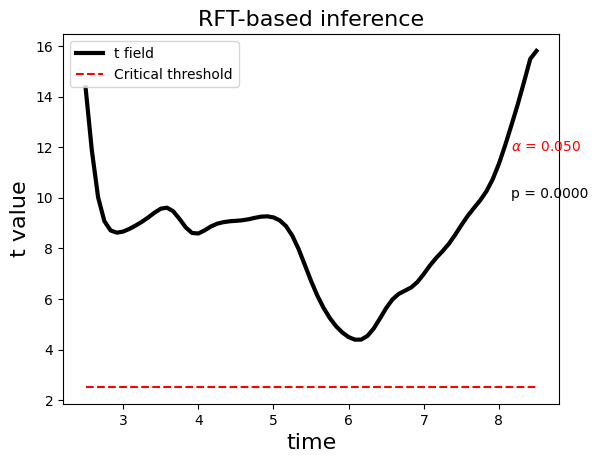

time: (8.5, 14.5)
n_cells for diff: 388 , n_cells for con: 7 , nClusters: 1 [0.0] Pset 0.0 2.567560711356874


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


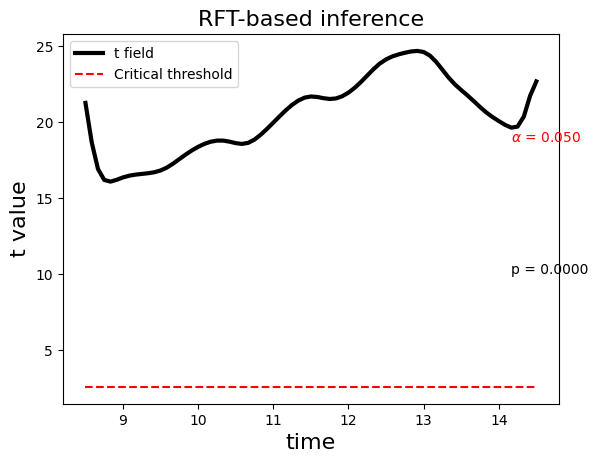

time: (14.5, 20.5)
n_cells for diff: 558 , n_cells for con: 30 , nClusters: 1 [0.0] Pset 0.0 2.5680181518123266


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


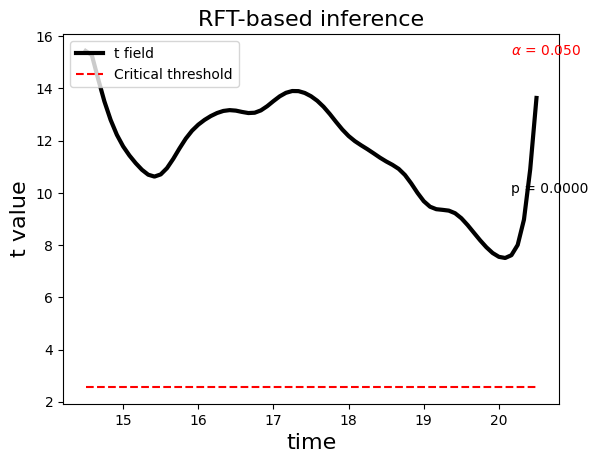

time: (20.5, 26.5)

intensity
time: (2.5, 8.5)
n_cells for diff: 23 , n_cells for con: 4 , nClusters: 2 [0.04990514545978619, 2.7281925796263096e-07] Pset 0.0012665096652794139 2.4768125508421353


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


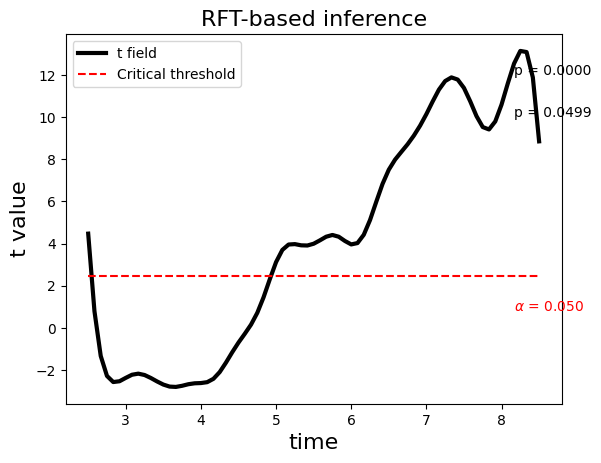

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (8.5, 14.5)
n_cells for diff: 388 , n_cells for con: 7 , nClusters: 1 [0.0] Pset 0.0 2.5908588317004244


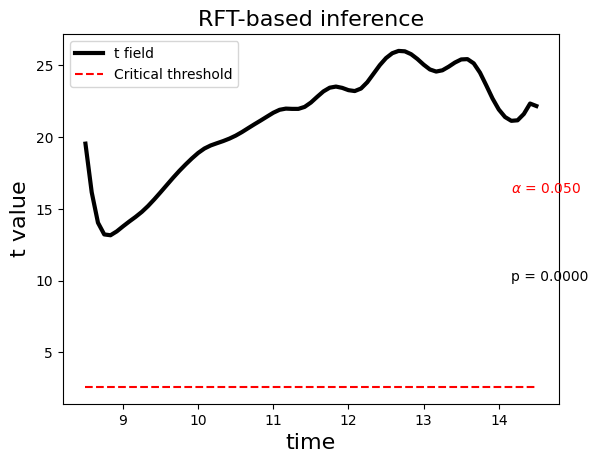

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (14.5, 20.5)
n_cells for diff: 557 , n_cells for con: 30 , nClusters: 1 [0.0] Pset 0.0 2.5856293081660726


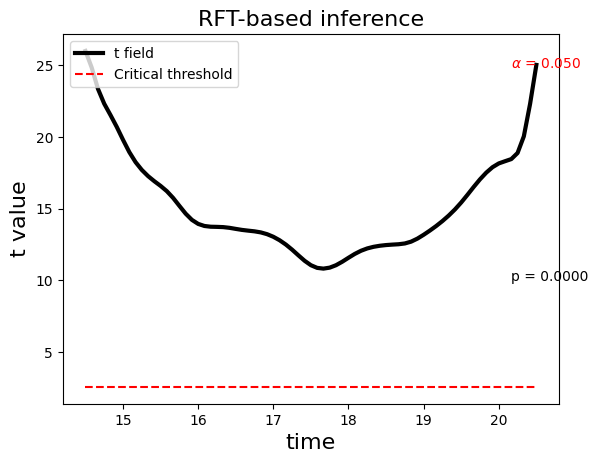

time: (20.5, 26.5)


In [71]:
print("motility")
plot_rft(scores_df_s3, scores_df_s2, "score_motility", "s3", "s2", (-10, 30))
print("\nintensity")
plot_rft(scores_df_s3, scores_df_s2, "score_intensity", "s3", "s2", (-10, 30))

motility
time: (2.5, 8.5)
n_cells for diff: 7 , n_cells for con: 23 , nClusters: 1 [0.04999999997088456] Pset 0.04999999997088456 2.5323049842446883


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


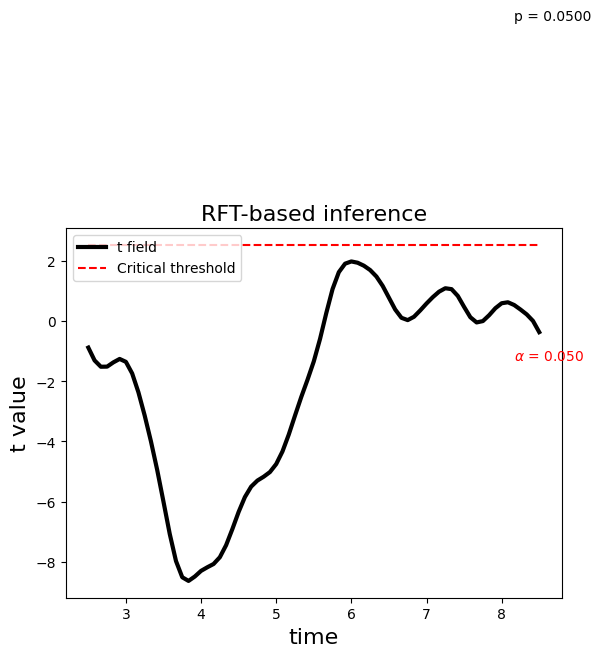

time: (8.5, 14.5)
n_cells for diff: 57 , n_cells for con: 388 , nClusters: 1 [0.0031815201758526035] Pset 0.0031815201758526035 2.5681529718085407


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


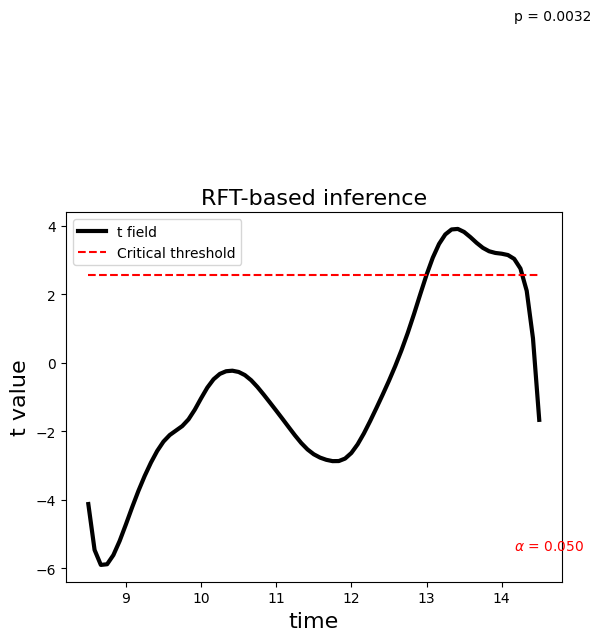

time: (14.5, 20.5)
n_cells for diff: 95 , n_cells for con: 558 , nClusters: 1 [0.0] Pset 0.0 2.564007158300388


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


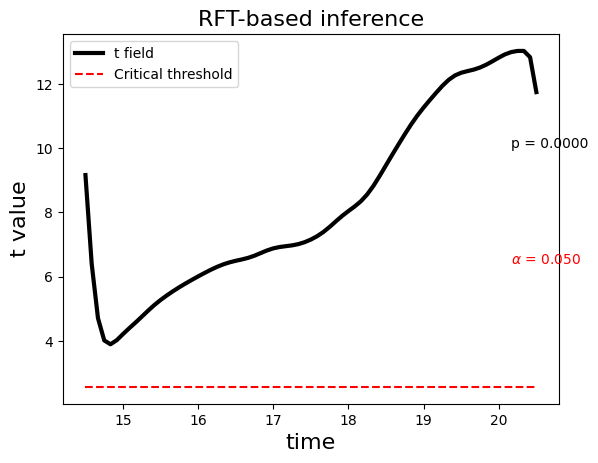

time: (20.5, 26.5)


In [76]:
print("motility")
plot_rft(scores_df_s6, scores_df_s3, "score_motility", "s6", "s3", ylim=(-15, 15))

intensity
time: (2.5, 8.5)
n_cells for diff: 23 , n_cells for con: 7 , nClusters: 1 [0.000973896424167231] Pset 0.000973896424167231 2.4837343119542155


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


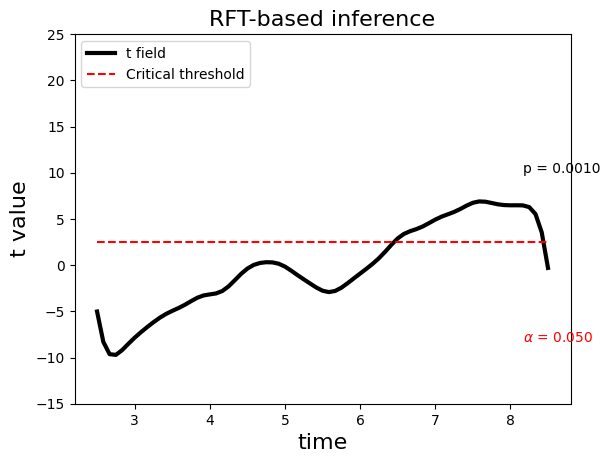

time: (8.5, 14.5)
n_cells for diff: 388 , n_cells for con: 56 , nClusters: 1 [0.0] Pset 0.0 2.593109447721429


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


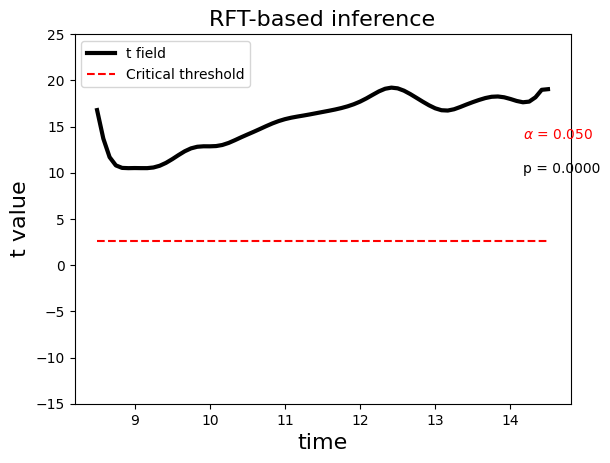

time: (14.5, 20.5)
n_cells for diff: 557 , n_cells for con: 95 , nClusters: 1 [0.0] Pset 0.0 2.592249423599997


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


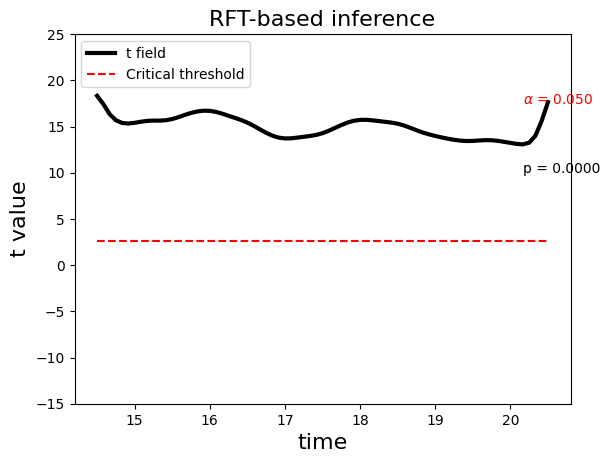

time: (20.5, 26.5)


In [79]:
print("intensity")
plot_rft(scores_df_s3, scores_df_s6, "score_intensity", "s3", "s6", ylim=(-15, 25))

motility
time: (2.5, 8.5)
n_cells for diff: 7 , n_cells for con: 7 , nClusters: 1 [0.0] 0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


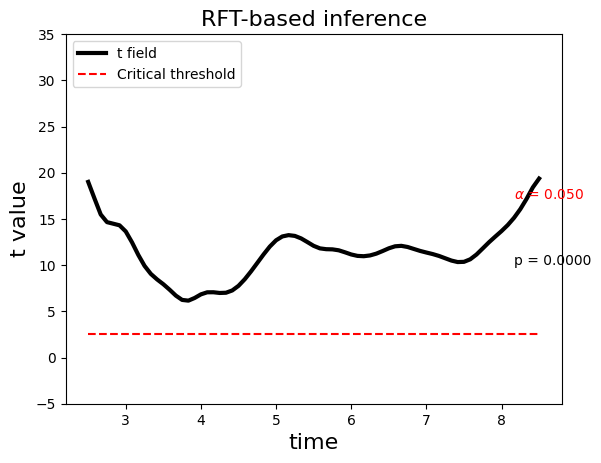

time: (8.5, 14.5)
n_cells for diff: 57 , n_cells for con: 13 , nClusters: 1 [0.0] 0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


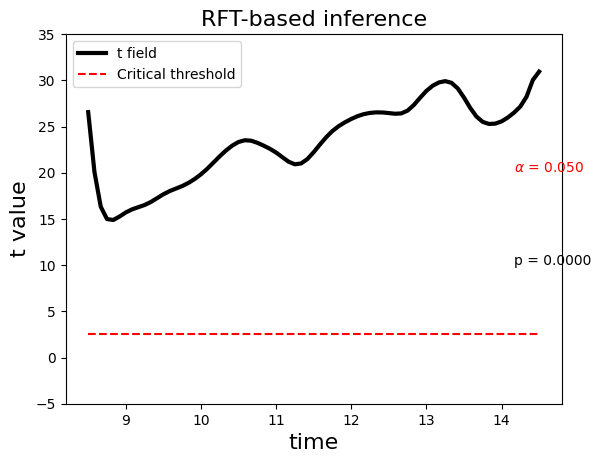

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (14.5, 20.5)
n_cells for diff: 95 , n_cells for con: 27 , nClusters: 1 [0.0] 0.0


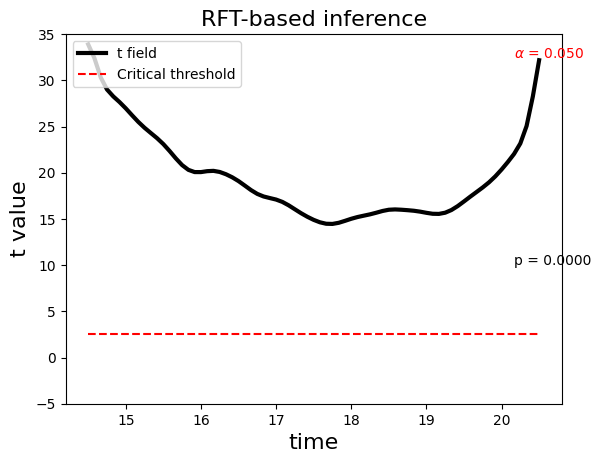

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (20.5, 26.5)
intensity
time: (2.5, 8.5)
n_cells for diff: 7 , n_cells for con: 7 , nClusters: 1 [0.0] 0.0


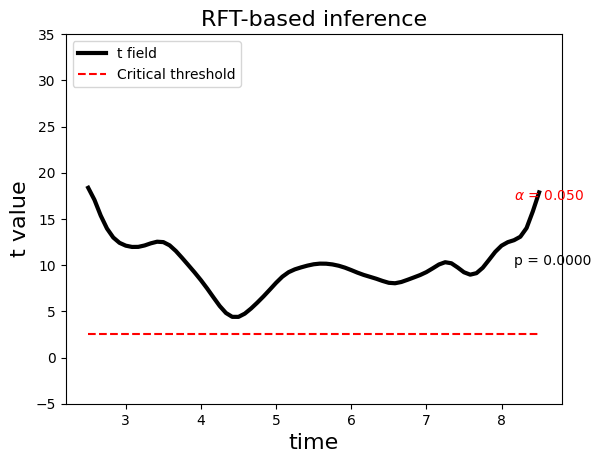

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (8.5, 14.5)
n_cells for diff: 56 , n_cells for con: 13 , nClusters: 2 [0.0, 0.04752364046189095] 0.0011475744483466777


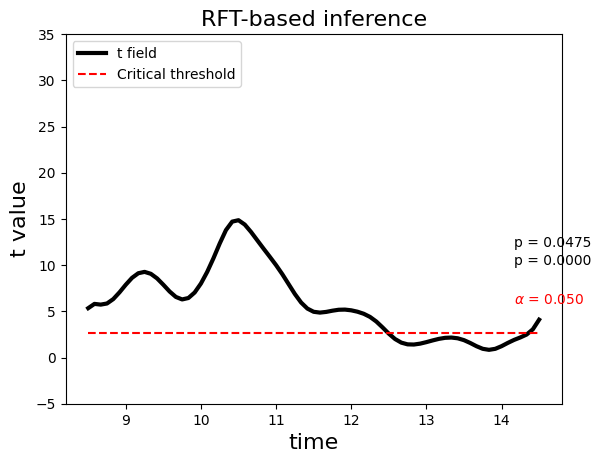

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (14.5, 20.5)
n_cells for diff: 95 , n_cells for con: 27 , nClusters: 1 [4.769629136092135e-12] 4.769629136092135e-12


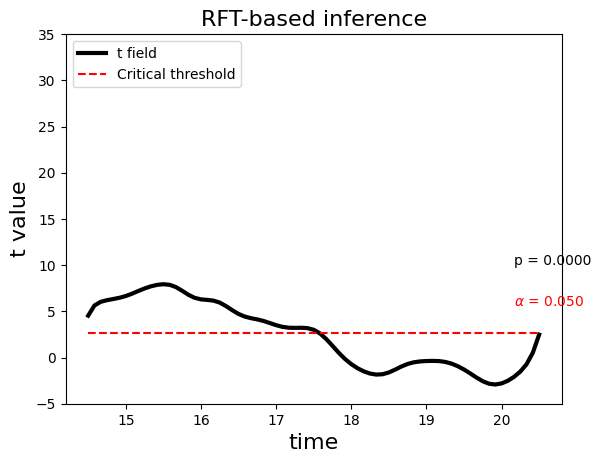

time: (20.5, 26.5)


In [53]:
print("motility")
plot_rft(scores_df_s6, scores_df_s8, "score_motility", "s6", "s8", ylim=(-5, 35))
print("intensity")
plot_rft(scores_df_s6, scores_df_s8, "score_intensity", "s6", "s8", ylim=(-5, 35))

In [54]:
scores_df_s5["Spot track ID"].nunique(), scores_df_s1["Spot track ID"].nunique()

(420, 249)

motility
time: (2.5, 8.5)
n_cells for diff: 13 , n_cells for con: 44 , nClusters: 1 [0.0] 0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


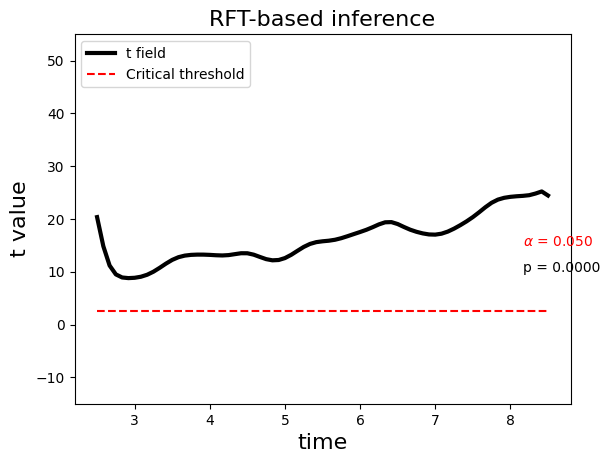

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (8.5, 14.5)
n_cells for diff: 73 , n_cells for con: 17 , nClusters: 1 [0.0] 0.0


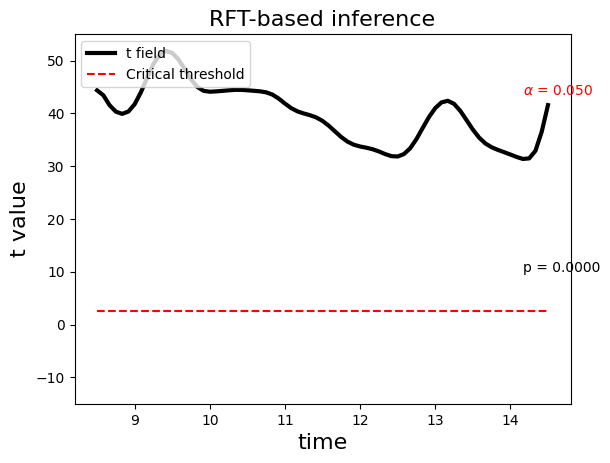

time: (14.5, 20.5)
n_cells for diff: 249 , n_cells for con: 31 , nClusters: 1 [0.0] 0.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


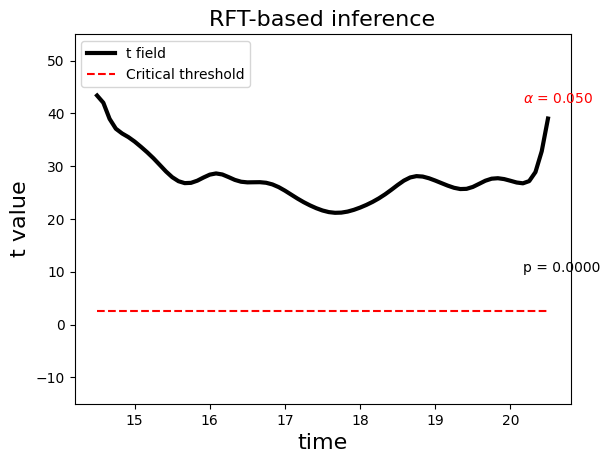

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (20.5, 26.5)
n_cells for diff: 342 , n_cells for con: 97 , nClusters: 1 [0.00410782822479927] 0.00410782822479927


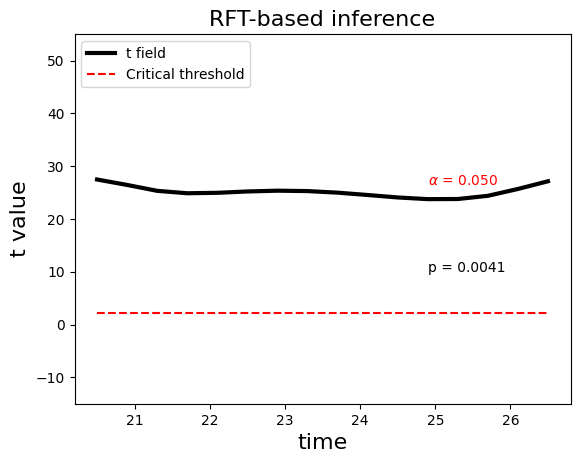

intensity
time: (2.5, 8.5)
n_cells for diff: 11 , n_cells for con: 41 , nClusters: 2 [0.049776615485386366, 0.0] 0.0012599384655944679


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


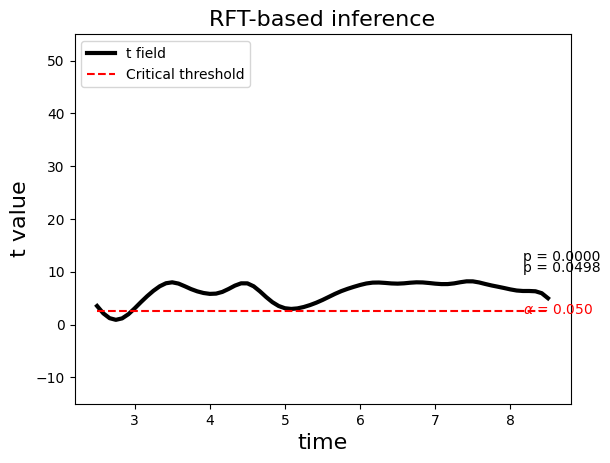

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (8.5, 14.5)
n_cells for diff: 73 , n_cells for con: 15 , nClusters: 1 [0.0] 0.0


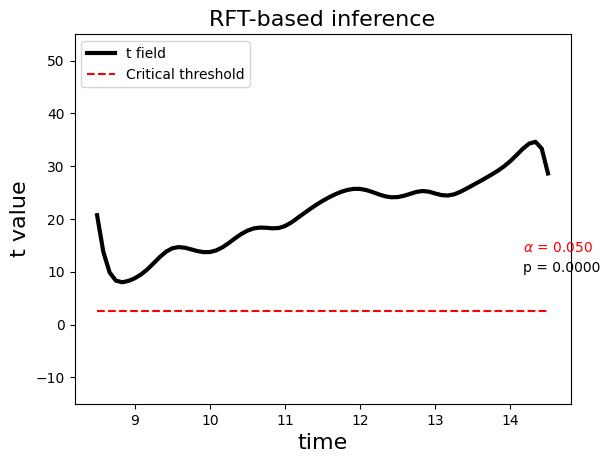

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (14.5, 20.5)
n_cells for diff: 249 , n_cells for con: 30 , nClusters: 1 [0.0] 0.0


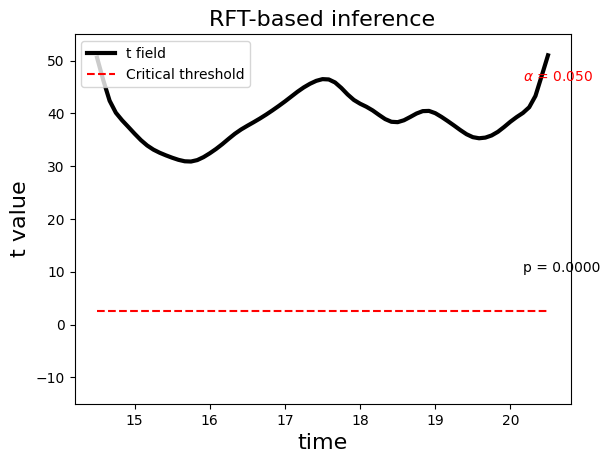

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


time: (20.5, 26.5)
n_cells for diff: 341 , n_cells for con: 97 , nClusters: 1 [0.004750150176826784] 0.004750150176826784


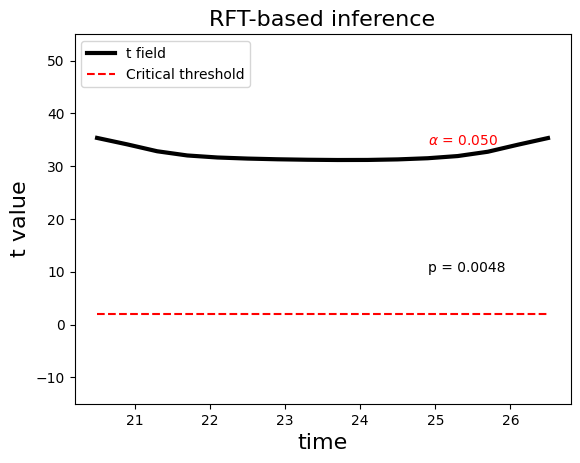

In [55]:
print("motility")
plot_rft(scores_df_s5, scores_df_s1, "score_motility", "s5", "s1", (-15, 55))
print("intensity")
plot_rft(scores_df_s5, scores_df_s1, "score_intensity", "s5", "s1", (-15, 55))